## Mean Normalization


Mean normalization involves centering the variable at zero, and re-scaling to the value range. The procedure involves subtracting the mean of each observation and then dividing by difference between the minimum and maximum value:

**x_scaled = (x - x_mean) / ( x_max - x_min)**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# the scalers - for mean normalisation
from sklearn.preprocessing import StandardScaler, RobustScaler

In [2]:
# load the California House price data from Scikit-learn
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

# Remove 2 variables:
X.drop(labels=["Latitude", "Longitude"], axis=1, inplace=True)

# display top 5 rows
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467


In [3]:
# let's separate the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0,
)

X_train.shape, X_test.shape

((14448, 6), (6192, 6))

In [4]:
# let's first learn the mean from the train set

means = X_train.mean(axis=0)
means

MedInc           3.866667
HouseAge        28.618702
AveRooms         5.423404
AveBedrms        1.094775
Population    1425.157323
AveOccup         3.040518
dtype: float64

In [5]:
# let's now learn the min and max values, and the value range
# from the train set

ranges = X_train.max(axis=0) - X_train.min(axis=0)
ranges

MedInc           14.500200
HouseAge         51.000000
AveRooms        131.687179
AveBedrms        33.733333
Population    35679.000000
AveOccup        598.964286
dtype: float64

In [6]:
# now we are ready to perform mean normalization:

X_train_scaled = (X_train - means) / ranges
X_test_scaled = (X_test - means) / ranges

## Mean Normalization with Scikit-learn: work-around

In [7]:
# set up the StandardScaler so that it removes the mean
# but does not divide by the standard deviation
scaler_mean = StandardScaler(with_mean=True, with_std=False)

# set up the robustscaler so that it does NOT remove the median
# but normalises by max()-min(), important for this to set up the
# quantile range to 0 and 100, which represent the min and max values
scaler_minmax = RobustScaler(
    with_centering=False, with_scaling=True, quantile_range=(0, 100)
)

# fit the scalers to the train set, it will learn the parameters
scaler_mean.fit(X_train)
scaler_minmax.fit(X_train)

# transform train and test sets
X_train_scaled = scaler_minmax.transform(scaler_mean.transform(X_train))
X_test_scaled = scaler_minmax.transform(scaler_mean.transform(X_test))

C:\Users\Sole\Documents\Repositories\envs\feml\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(
C:\Users\Sole\Documents\Repositories\envs\feml\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


In [8]:
# let's transform the returned NumPy arrays to dataframes

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [9]:
# Inspect the original value statistics
X_test.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
count,6192.000000,6192.000000,6192.000000,6192.000000,6192.000000,6192.000000
mean,3.880013,28.687984,5.442057,1.101109,1426.222061,3.140976
std,1.920007,12.560416,2.862733,0.519956,1091.567168,15.796292
min,0.499900,1.000000,1.465753,0.500000,8.000000,0.692308
25%,2.552150,18.000000,4.414452,1.006494,796.000000,2.436452
50%,3.529600,29.000000,5.227365,1.048741,1169.500000,2.825041
75%,4.768750,37.000000,6.064257,1.098434,1727.250000,3.285501
max,15.000100,52.000000,141.909091,25.636364,16305.000000,1243.333333


In [10]:
# inspect the values after scaling

X_test_scaled.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
count,6192.000000,6192.000000,6192.000000,6192.000000,6192.000000,6192.000000
mean,0.000920,0.001358,0.000142,0.000188,0.000030,0.000168
std,0.132412,0.246283,0.021739,0.015414,0.030594,0.026373
min,-0.232188,-0.541543,-0.030053,-0.017632,-0.039720,-0.003920
25%,-0.090655,-0.208210,-0.007662,-0.002617,-0.017634,-0.001009
50%,-0.023246,0.007476,-0.001489,-0.001365,-0.007165,-0.000360
75%,0.062212,0.164339,0.004866,0.000108,0.008467,0.000409
max,0.767812,0.458457,1.036439,0.727517,0.417048,2.070729


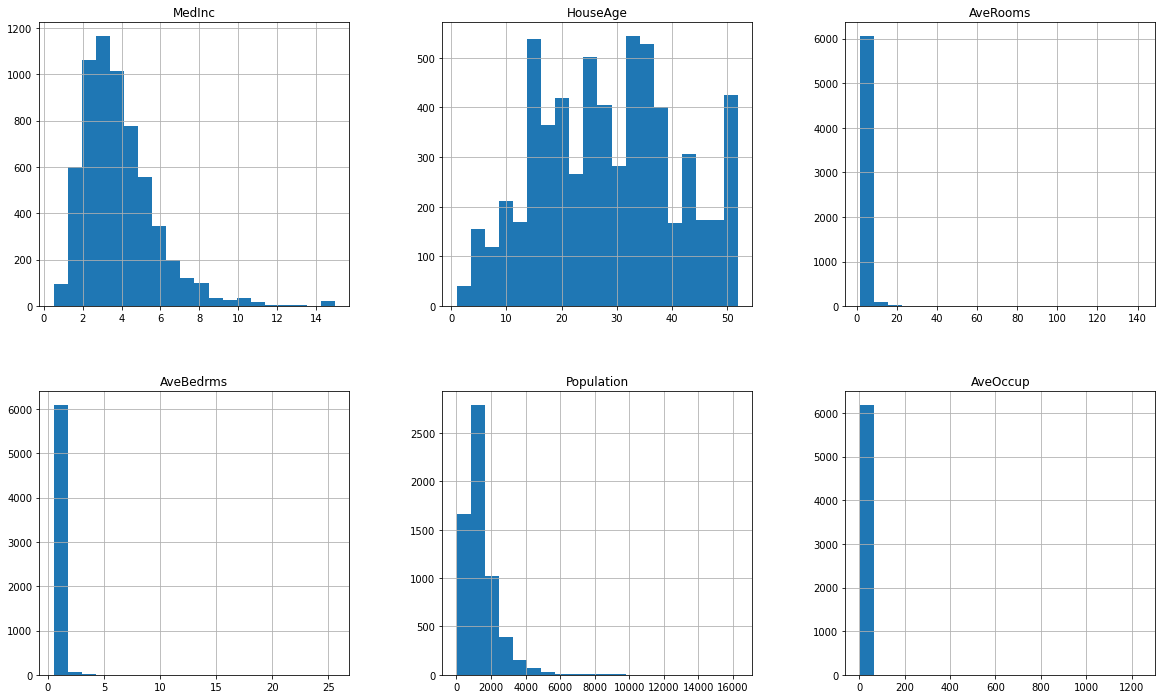

In [11]:
X_test.hist(bins=20, figsize=(20, 12), layout=(2, 3))
plt.show()

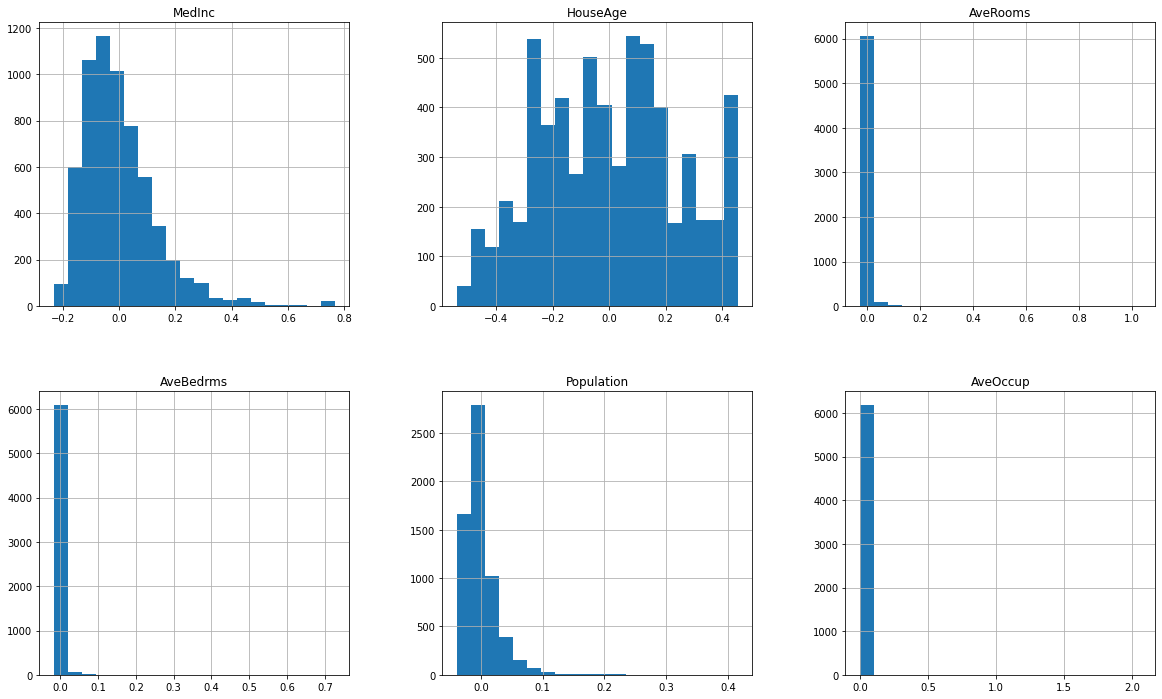

In [12]:
X_test_scaled.hist(bins=20, figsize=(20, 12), layout=(2, 3))
plt.show()